* https://towardsdatascience.com/4x-faster-scikit-learn-in-3-lines-of-code-6b8799876b4a
* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
import seaborn as sns

In [69]:
blackhole_data = pd.read_csv('https://www.scidrive.org/vospace-2.0/data/581beddf-4b3a-4695-ba1e-5b12d5213d4f').sort_index(axis=0)

In [70]:
blackhole_data.head(5)

Total_Stellar_Mass  Bulge_Stellar_Mass  Black_Hole_Mass  Cold_Gas_Mass  \
0            0.387174            0.385160         0.001336       0.048123   
1            0.846767            0.433929         0.001186       0.137686   
2            7.126350            1.604110         0.002302       1.188430   
3            3.070790            1.558470         0.002598       0.306917   
4           10.361900            6.639080         0.008644       0.008921   

   Hot_Gas_Mass  Ejected_Gas_Mass  Intracluster_Stars_Mass  \
0       5.19501          0.000000                  0.00000   
1      66.12800          0.003088                  7.13868   
2      26.53040          0.000085                  7.96940   
3      18.74110          0.000000                  1.30453   
4      15.85170          0.000000                  1.64459   

   Metals_Total_Stellar_Mass  Metals_Bulge_Mass  Metals_Cold_Gas_Mass  ...  \
0                   0.002855           0.002849              0.000174  ...   
1                   0.009145           0.004651              0.000601  ...   
2                   0.105054           0.023272              0.017817  ...   
3                   0.047296           0.019162              0.007339  ...   
4                   0.201302           0.119072              0.000169  ...   

   SDSS_u_Absolute  SDSS_u_Apparent  SDSS_g_Absolute  SDSS_g_Apparent  \
0         -15.5459         -15.5459         -17.1477         -17.1477   
1         -16.9576         -16.9576         -18.6827         -18.6827   
2         -19.5330         -19.5330         -21.2105         -21.2105   
3         -18.3343         -18.3343         -20.1066         -20.1066   
4         -20.1827         -20.1827         -21.8739         -21.8739   

   SDSS_r_Absolute  SDSS_r_Apparent  SDSS_i_Absolute  SDSS_i_Apparent  \
0         -17.8345         -17.8345         -18.1590         -18.1590   
1         -19.4239         -19.4239         -19.7875         -19.7875   
2         -21.9265         -21.9265         -22.2808         -22.2808   
3         -20.8614         -20.8614         -21.2333         -21.2333   
4         -22.5845         -22.5845         -22.9369         -22.9369   

   SDSS_z_Absolute  SDSS_z_Apparent  
0         -18.3906         -18.3906  
1         -20.0660         -20.0660  
2         -22.5680         -22.5680  
3         -21.5355         -21.5355  
4         -23.2389         -23.2389  

[5 rows x 32 columns]

In [71]:
blackhole_data.isnull().sum()

Total_Stellar_Mass                 0
Bulge_Stellar_Mass                 0
Black_Hole_Mass                    0
Cold_Gas_Mass                      0
Hot_Gas_Mass                       0
Ejected_Gas_Mass                   0
Intracluster_Stars_Mass            0
Metals_Total_Stellar_Mass          0
Metals_Bulge_Mass                  0
Metals_Cold_Gas_Mass               0
Metals_Hot_Gas_Mass                0
Metals_Ejected_Gas_Mass            0
Metals_IntraCluster_Stars_Mass     0
Galaxy_Classification              0
Disk_Scale_Radius                  0
Total_Star_Formation_Rate          0
Hot_Gas_Cooling_Rate               0
AGN_Heating_Rate                   0
Quasar_BH_Accretion_Mass           0
Supernova_Cold_Gas_Outflow_Rate    0
Mean_Age_of_Stars                  0
Galaxy_ID                          0
SDSS_u_Absolute                    0
SDSS_u_Apparent                    0
SDSS_g_Absolute                    0
SDSS_g_Apparent                    0
SDSS_r_Absolute                    0
S

In [72]:
blackhole_data.shape

(5582544, 32)

In [73]:
blackhole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5582544 entries, 0 to 5582543
Data columns (total 32 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Total_Stellar_Mass               float64
 1   Bulge_Stellar_Mass               float64
 2   Black_Hole_Mass                  float64
 3   Cold_Gas_Mass                    float64
 4   Hot_Gas_Mass                     float64
 5   Ejected_Gas_Mass                 float64
 6   Intracluster_Stars_Mass          float64
 7   Metals_Total_Stellar_Mass        float64
 8   Metals_Bulge_Mass                float64
 9   Metals_Cold_Gas_Mass             float64
 10  Metals_Hot_Gas_Mass              float64
 11  Metals_Ejected_Gas_Mass          float64
 12  Metals_IntraCluster_Stars_Mass   float64
 13  Galaxy_Classification            int64  
 14  Disk_Scale_Radius                float64
 15  Total_Star_Formation_Rate        float64
 16  Hot_Gas_Cooling_Rate             float64
 17  AGN_Heat

In [74]:
blackhole_data.describe()

Total_Stellar_Mass  Bulge_Stellar_Mass  Black_Hole_Mass  Cold_Gas_Mass  \
count        5.582544e+06        5.582544e+06     5.582544e+06   5.582544e+06   
mean         4.909592e+00        2.364215e+00     3.392910e-03   4.252831e-01   
std          3.653256e+00        2.560649e+00     3.822004e-03   6.232440e-01   
min          9.915940e-04        0.000000e+00     1.000000e-03   0.000000e+00   
25%          2.446618e+00        8.740967e-01     1.453670e-03   4.576240e-02   
50%          4.281780e+00        1.656365e+00     2.275330e-03   1.886720e-01   
75%          6.584540e+00        2.924780e+00     3.934980e-03   5.578940e-01   
max          1.079870e+02        8.896410e+01     2.709720e-01   5.786100e+01   

       Hot_Gas_Mass  Ejected_Gas_Mass  Intracluster_Stars_Mass  \
count  5.582544e+06      5.582544e+06             5.582544e+06   
mean   4.016275e+01      1.179279e-01             3.891224e+00   
std    1.597644e+02      4.178541e-01             2.089507e+01   
min    0.000000e+00      0.000000e+00             0.000000e+00   
25%    3.035188e+00      0.000000e+00             0.000000e+00   
50%    8.746390e+00      0.000000e+00             3.242845e-01   
75%    2.696360e+01      1.308470e-02             1.807650e+00   
max    2.367700e+04      4.437860e+01             4.005620e+03   

       Metals_Total_Stellar_Mass  Metals_Bulge_Mass  Metals_Cold_Gas_Mass  \
count               5.582544e+06       5.582544e+06          5.582544e+06   
mean                7.663113e-02       3.336552e-02          9.722163e-03   
std                 6.109218e-02       3.724335e-02          1.384802e-02   
min                 1.569460e-07       0.000000e+00          0.000000e+00   
25%                 3.077940e-02       9.696257e-03          1.765638e-04   
50%                 6.536980e-02       2.208060e-02          3.924700e-03   
75%                 1.071780e-01       4.326800e-02          1.395590e-02   
max                 1.089780e+00       9.919820e-01          4.084480e-01   

       ...  SDSS_u_Absolute  SDSS_u_Apparent  SDSS_g_Absolute  \
count  ...     5.582544e+06     5.582544e+06     5.582544e+06   
mean   ...    -1.891233e+01    -1.891233e+01    -2.043101e+01   
std    ...     1.742710e+00     1.742710e+00     1.601605e+00   
min    ...    -2.503940e+01    -2.503940e+01    -2.589920e+01   
25%    ...    -2.004420e+01    -2.004420e+01    -2.147250e+01   
50%    ...    -1.900510e+01    -1.900510e+01    -2.071080e+01   
75%    ...    -1.813060e+01    -1.813060e+01    -1.982080e+01   
max    ...     1.000000e+02     1.000000e+02     1.000000e+02   

       SDSS_g_Apparent  SDSS_r_Absolute  SDSS_r_Apparent  SDSS_i_Absolute  \
count     5.582544e+06     5.582544e+06     5.582544e+06     5.582544e+06   
mean     -2.043101e+01    -2.107098e+01    -2.107098e+01    -2.139576e+01   
std       1.601605e+00     1.549586e+00     1.549586e+00     1.541691e+00   
min      -2.589920e+01    -2.615390e+01    -2.615390e+01    -2.630480e+01   
25%      -2.147250e+01    -2.206030e+01    -2.206030e+01    -2.237090e+01   
50%      -2.071080e+01    -2.142530e+01    -2.142530e+01    -2.177540e+01   
75%      -1.982080e+01    -2.053760e+01    -2.053760e+01    -2.088890e+01   
max       1.000000e+02     1.000000e+02     1.000000e+02     1.000000e+02   

       SDSS_i_Apparent  SDSS_z_Absolute  SDSS_z_Apparent  
count     5.582544e+06     5.582544e+06     5.582544e+06  
mean     -2.139576e+01    -2.166196e+01    -2.166196e+01  
std       1.541691e+00     1.554221e+00     1.554221e+00  
min      -2.630480e+01    -2.643250e+01    -2.643250e+01  
25%      -2.237090e+01    -2.264170e+01    -2.264170e+01  
50%      -2.177540e+01    -2.206170e+01    -2.206170e+01  
75%      -2.088890e+01    -2.116500e+01    -2.116500e+01  
max       1.000000e+02     1.000000e+02     1.000000e+02  

[8 rows x 32 columns]

In [75]:
blackhole_data.Galaxy_Classification

0          0
1          0
2          0
3          0
4          0
          ..
5582539    0
5582540    1
5582541    0
5582542    1
5582543    1
Name: Galaxy_Classification, Length: 5582544, dtype: int64

In [76]:
dataframe = blackhole_data.drop(columns=['Metals_Total_Stellar_Mass','Metals_Bulge_Mass','Metals_Cold_Gas_Mass','Metals_Hot_Gas_Mass','Metals_Ejected_Gas_Mass','Metals_IntraCluster_Stars_Mass','Galaxy_Classification','Galaxy_ID','SDSS_u_Absolute','SDSS_u_Apparent','SDSS_g_Absolute','SDSS_g_Apparent','SDSS_r_Absolute','SDSS_r_Apparent','SDSS_i_Absolute','SDSS_i_Apparent','SDSS_z_Absolute','SDSS_z_Apparent'])

In [77]:
dataframe.head(5)

Total_Stellar_Mass  Bulge_Stellar_Mass  Black_Hole_Mass  Cold_Gas_Mass  \
0            0.387174            0.385160         0.001336       0.048123   
1            0.846767            0.433929         0.001186       0.137686   
2            7.126350            1.604110         0.002302       1.188430   
3            3.070790            1.558470         0.002598       0.306917   
4           10.361900            6.639080         0.008644       0.008921   

   Hot_Gas_Mass  Ejected_Gas_Mass  Intracluster_Stars_Mass  Disk_Scale_Radius  \
0       5.19501          0.000000                  0.00000           0.001348   
1      66.12800          0.003088                  7.13868           0.006409   
2      26.53040          0.000085                  7.96940           0.009066   
3      18.74110          0.000000                  1.30453           0.003364   
4      15.85170          0.000000                  1.64459           0.002928   

   Total_Star_Formation_Rate  Hot_Gas_Cooling_Rate  AGN_Heating_Rate  \
0                   0.000000                0.0000            0.0000   
1                   0.000000                0.0000            0.0000   
2                   0.079265                0.0000            0.0000   
3                   0.000000               36.9508           36.9508   
4                   0.000000                0.0000            0.0000   

   Quasar_BH_Accretion_Mass  Supernova_Cold_Gas_Outflow_Rate  \
0                       0.0                         0.000000   
1                       0.0                         0.000000   
2                       0.0                         0.237794   
3                       0.0                         0.000000   
4                       0.0                         0.000000   

   Mean_Age_of_Stars  
0            7985.00  
1            8691.27  
2            6149.49  
3            7070.59  
4            4956.67

In [78]:
dataframe.tail(5)

Total_Stellar_Mass  Bulge_Stellar_Mass  Black_Hole_Mass  \
5582539             3.17736            0.986222         0.001021   
5582540             1.53873            1.036010         0.002222   
5582541             5.42521            5.394430         0.003953   
5582542             3.41019            1.603280         0.001192   
5582543             5.42059            5.420590         0.010988   

         Cold_Gas_Mass  Hot_Gas_Mass  Ejected_Gas_Mass  \
5582539       0.606594       1.66838          0.710737   
5582540       0.075676       3.00467          0.000000   
5582541       0.369094     257.56900          0.000000   
5582542       0.000000       0.00000          0.000000   
5582543       0.525618     495.86300          0.000000   

         Intracluster_Stars_Mass  Disk_Scale_Radius  \
5582539                 0.080638           0.003191   
5582540                 0.000000           0.001502   
5582541                37.377600           0.026973   
5582542                 0.000000           0.003986   
5582543                 0.000000           0.005344   

         Total_Star_Formation_Rate  Hot_Gas_Cooling_Rate  AGN_Heating_Rate  \
5582539                    3.69168               40.8198           40.0782   
5582540                    0.00000               39.4755           39.4755   
5582541                    0.00000                0.0000            0.0000   
5582542                    0.00000                0.0000            0.0000   
5582543                    0.00000                0.0000            0.0000   

         Quasar_BH_Accretion_Mass  Supernova_Cold_Gas_Outflow_Rate  \
5582539                       0.0                           11.075   
5582540                       0.0                            0.000   
5582541                       0.0                            0.000   
5582542                       0.0                            0.000   
5582543                       0.0                            0.000   

         Mean_Age_of_Stars  
5582539            4893.11  
5582540            7665.29  
5582541            7090.20  
5582542            6796.17  
5582543            8093.63

In [79]:
dataframe.corr()

Total_Stellar_Mass  Bulge_Stellar_Mass  \
Total_Stellar_Mass                         1.000000            0.630543   
Bulge_Stellar_Mass                         0.630543            1.000000   
Black_Hole_Mass                            0.540316            0.790790   
Cold_Gas_Mass                              0.411170           -0.151453   
Hot_Gas_Mass                               0.280487            0.348251   
Ejected_Gas_Mass                          -0.030876            0.015876   
Intracluster_Stars_Mass                    0.256317            0.316925   
Disk_Scale_Radius                          0.166562            0.188084   
Total_Star_Formation_Rate                  0.324577           -0.069213   
Hot_Gas_Cooling_Rate                       0.098805           -0.066934   
AGN_Heating_Rate                           0.097974           -0.065743   
Quasar_BH_Accretion_Mass                   0.097701            0.153443   
Supernova_Cold_Gas_Outflow_Rate            0.324040           -0.070727   
Mean_Age_of_Stars                         -0.286388           -0.003233   

                                 Black_Hole_Mass  Cold_Gas_Mass  Hot_Gas_Mass  \
Total_Stellar_Mass                      0.540316       0.411170      0.280487   
Bulge_Stellar_Mass                      0.790790      -0.151453      0.348251   
Black_Hole_Mass                         1.000000      -0.098388      0.511548   
Cold_Gas_Mass                          -0.098388       1.000000      0.026944   
Hot_Gas_Mass                            0.511548       0.026944      1.000000   
Ejected_Gas_Mass                       -0.032532      -0.015519     -0.044715   
Intracluster_Stars_Mass                 0.459448       0.036422      0.772429   
Disk_Scale_Radius                       0.308173       0.135948      0.338311   
Total_Star_Formation_Rate              -0.120813       0.639031     -0.068571   
Hot_Gas_Cooling_Rate                   -0.127873       0.319687     -0.067585   
AGN_Heating_Rate                       -0.126165       0.315838     -0.066538   
Quasar_BH_Accretion_Mass                0.185134      -0.018446      0.066596   
Supernova_Cold_Gas_Outflow_Rate        -0.122213       0.639644     -0.068984   
Mean_Age_of_Stars                       0.178402      -0.423350      0.208793   

                                 Ejected_Gas_Mass  Intracluster_Stars_Mass  \
Total_Stellar_Mass                      -0.030876                 0.256317   
Bulge_Stellar_Mass                       0.015876                 0.316925   
Black_Hole_Mass                         -0.032532                 0.459448   
Cold_Gas_Mass                           -0.015519                 0.036422   
Hot_Gas_Mass                            -0.044715                 0.772429   
Ejected_Gas_Mass                         1.000000                -0.031994   
Intracluster_Stars_Mass                 -0.031994                 1.000000   
Disk_Scale_Radius                       -0.053693                 0.348911   
Total_Star_Formation_Rate                0.142684                -0.042438   
Hot_Gas_Cooling_Rate                     0.266980                -0.059253   
AGN_Heating_Rate                         0.258123                -0.058592   
Quasar_BH_Accretion_Mass                 0.344028                 0.070546   
Supernova_Cold_Gas_Outflow_Rate          0.138942                -0.042885   
Mean_Age_of_Stars                       -0.292999                 0.150238   

                                 Disk_Scale_Radius  Total_Star_Formation_Rate  \
Total_Stellar_Mass                        0.166562                   0.324577   
Bulge_Stellar_Mass                        0.188084                  -0.069213   
Black_Hole_Mass                           0.308173                  -0.120813   
Cold_Gas_Mass                             0.135948                   0.639031   
Hot_Gas_Mass                              0.338311                  -0.068571   
Ejected_Gas_Mass                  

In [80]:
dataframe.describe()

Total_Stellar_Mass  Bulge_Stellar_Mass  Black_Hole_Mass  Cold_Gas_Mass  \
count        5.582544e+06        5.582544e+06     5.582544e+06   5.582544e+06   
mean         4.909592e+00        2.364215e+00     3.392910e-03   4.252831e-01   
std          3.653256e+00        2.560649e+00     3.822004e-03   6.232440e-01   
min          9.915940e-04        0.000000e+00     1.000000e-03   0.000000e+00   
25%          2.446618e+00        8.740967e-01     1.453670e-03   4.576240e-02   
50%          4.281780e+00        1.656365e+00     2.275330e-03   1.886720e-01   
75%          6.584540e+00        2.924780e+00     3.934980e-03   5.578940e-01   
max          1.079870e+02        8.896410e+01     2.709720e-01   5.786100e+01   

       Hot_Gas_Mass  Ejected_Gas_Mass  Intracluster_Stars_Mass  \
count  5.582544e+06      5.582544e+06             5.582544e+06   
mean   4.016275e+01      1.179279e-01             3.891224e+00   
std    1.597644e+02      4.178541e-01             2.089507e+01   
min    0.000000e+00      0.000000e+00             0.000000e+00   
25%    3.035188e+00      0.000000e+00             0.000000e+00   
50%    8.746390e+00      0.000000e+00             3.242845e-01   
75%    2.696360e+01      1.308470e-02             1.807650e+00   
max    2.367700e+04      4.437860e+01             4.005620e+03   

       Disk_Scale_Radius  Total_Star_Formation_Rate  Hot_Gas_Cooling_Rate  \
count       5.582544e+06               5.582544e+06          5.582544e+06   
mean        6.711498e-03               1.815062e+00          1.664601e+01   
std         7.555015e-03               4.081808e+00          1.977753e+01   
min         8.717570e-06               0.000000e+00          0.000000e+00   
25%         2.515740e-03               0.000000e+00          0.000000e+00   
50%         4.394870e-03               0.000000e+00          0.000000e+00   
75%         8.092230e-03               7.328675e-01          3.957820e+01   
max         2.838410e-01               2.493820e+02          4.473890e+01   

       AGN_Heating_Rate  Quasar_BH_Accretion_Mass  \
count      5.582544e+06              5.582544e+06   
mean       1.649739e+01              3.551770e-05   
std        1.960540e+01              5.471734e-04   
min        0.000000e+00              0.000000e+00   
25%        0.000000e+00              0.000000e+00   
50%        0.000000e+00              0.000000e+00   
75%        3.955400e+01              0.000000e+00   
max        4.447380e+01              1.737630e-01   

       Supernova_Cold_Gas_Outflow_Rate  Mean_Age_of_Stars  
count                     5.582544e+06       5.582544e+06  
mean                      5.435796e+00       6.273383e+03  
std                       1.223928e+01       1.327727e+03  
min                       0.000000e+00       5.825520e+02  
25%                       0.000000e+00       5.133340e+03  
50%                       0.000000e+00       6.348145e+03  
75%                       2.137783e+00       7.405040e+03  
max                       7.481470e+02       9.087140e+03

In [81]:
X = dataframe.drop(['Black_Hole_Mass'],axis=1)

In [82]:
y = dataframe[['Black_Hole_Mass']]

In [83]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [84]:
standard = StandardScaler()
X_stnd = standard.fit_transform(X)

In [85]:
X_scale = pd.DataFrame(X_stnd,columns=X.columns)

In [86]:
X_scale.columns

Index(['Total_Stellar_Mass', 'Bulge_Stellar_Mass', 'Cold_Gas_Mass',
       'Hot_Gas_Mass', 'Ejected_Gas_Mass', 'Intracluster_Stars_Mass',
       'Disk_Scale_Radius', 'Total_Star_Formation_Rate',
       'Hot_Gas_Cooling_Rate', 'AGN_Heating_Rate', 'Quasar_BH_Accretion_Mass',
       'Supernova_Cold_Gas_Outflow_Rate', 'Mean_Age_of_Stars'],
      dtype='object')

In [87]:
X_scale.describe()

Total_Stellar_Mass  Bulge_Stellar_Mass  Cold_Gas_Mass  Hot_Gas_Mass  \
count        5.582544e+06        5.582544e+06   5.582544e+06  5.582544e+06   
mean        -3.343881e-15        3.604856e-16  -3.042504e-15 -1.151450e-15   
std          1.000000e+00        1.000000e+00   1.000000e+00  1.000000e+00   
min         -1.343624e+00       -9.232876e-01  -6.823702e-01 -2.513874e-01   
25%         -6.741862e-01       -5.819301e-01  -6.089441e-01 -2.323895e-01   
50%         -1.718500e-01       -2.764340e-01  -3.796445e-01 -1.966418e-01   
75%          4.584809e-01        2.189151e-01   2.127752e-01 -8.261633e-02   
max          2.821522e+01        3.381951e+01   9.215607e+01  1.479481e+02   

       Ejected_Gas_Mass  Intracluster_Stars_Mass  Disk_Scale_Radius  \
count      5.582544e+06             5.582544e+06       5.582544e+06   
mean      -4.172118e-14             6.233615e-15       1.405731e-16   
std        1.000000e+00             1.000000e+00       1.000000e+00   
min       -2.822226e-01            -1.862269e-01      -8.871963e-01   
25%       -2.822226e-01            -1.862269e-01      -5.553607e-01   
50%       -2.822226e-01            -1.707072e-01      -3.066345e-01   
75%       -2.509086e-01            -9.971607e-02       1.827571e-01   
max        1.059238e+02             1.915154e+02       3.668153e+01   

       Total_Star_Formation_Rate  Hot_Gas_Cooling_Rate  AGN_Heating_Rate  \
count               5.582544e+06          5.582544e+06      5.582544e+06   
mean                2.500393e-15         -3.840065e-14      7.638802e-14   
std                 1.000000e+00          1.000000e+00      1.000000e+00   
min                -4.446710e-01         -8.416631e-01     -8.414718e-01   
25%                -4.446710e-01         -8.416631e-01     -8.414718e-01   
50%                -4.446710e-01         -8.416631e-01     -8.414718e-01   
75%                -2.651262e-01          1.159508e+00      1.176034e+00   
max                 6.065130e+01          1.420445e+00      1.426975e+00   

       Quasar_BH_Accretion_Mass  Supernova_Cold_Gas_Outflow_Rate  \
count              5.582544e+06                     5.582544e+06   
mean               2.686661e-14                     1.795009e-15   
std                1.000000e+00                     1.000000e+00   
min               -6.491123e-02                    -4.441273e-01   
25%               -6.491123e-02                    -4.441273e-01   
50%               -6.491123e-02                    -4.441273e-01   
75%               -6.491123e-02                    -2.694616e-01   
max                3.174999e+02                     6.068262e+01   

       Mean_Age_of_Stars  
count       5.582544e+06  
mean        6.893091e-15  
std         1.000000e+00  
min        -4.286146e+00  
25%        -8.586427e-01  
50%         5.630844e-02  
75%         8.523270e-01  
max         2.119229e+00

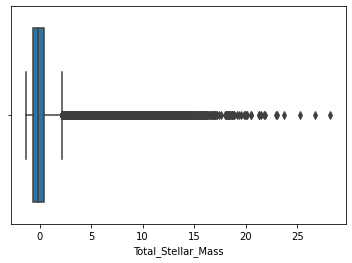

In [88]:
ax = sns.boxplot(x=X_scale['Total_Stellar_Mass'])

In [89]:
len(X_scale.columns)

13

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
PrincipalComponents = pca.fit_transform(X_scale)
PrincipalDf = pd.DataFrame(data=PrincipalComponents,columns=X_scale.columns).add_prefix('PCA_')
PrincipalDf.head(5)

PCA_Total_Stellar_Mass  PCA_Bulge_Stellar_Mass  PCA_Cold_Gas_Mass  \
0               -1.813225               -1.319588          -0.210663   
1               -2.074631               -0.643297          -0.323136   
2               -0.570337                0.494201          -1.054145   
3                0.089792               -0.786816           0.498084   
4               -0.674378                0.943573           0.061889   

   PCA_Hot_Gas_Mass  PCA_Ejected_Gas_Mass  PCA_Intracluster_Stars_Mass  \
0         -0.294292              0.478630                     0.903108   
1         -0.657902              0.855899                     0.585832   
2          0.696491              0.604859                    -0.193826   
3         -1.229288             -0.557379                    -0.313125   
4          1.933313             -1.689560                     0.225644   

   PCA_Disk_Scale_Radius  PCA_Total_Star_Formation_Rate  \
0               0.307541                      -0.374819   
1               0.458952                      -0.603689   
2              -0.374536                       0.989142   
3               0.782753                       0.290269   
4              -0.553453                       0.345660   

   PCA_Hot_Gas_Cooling_Rate  PCA_AGN_Heating_Rate  \
0                 -0.397988              0.110998   
1                 -0.587347              0.131950   
2                 -0.455796              0.242356   
3                 -0.301897              0.106329   
4                  0.425062             -0.018637   

   PCA_Quasar_BH_Accretion_Mass  PCA_Supernova_Cold_Gas_Outflow_Rate  \
0                      0.170588                            -0.000044   
1                      0.096216                             0.000632   
2                      0.117833                             0.000253   
3                      0.072694                            -0.000465   
4                     -0.161581                             0.000928   

   PCA_Mean_Age_of_Stars  
0              -0.000119  
1              -0.000283  
2              -0.000021  
3               0.000701  
4              -0.000270

In [91]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=13)
#PrincipalComponents = pca.fit_transform(X_scale)
#PrincipalDf = pd.DataFrame(data=PrincipalComponents,columns=['pca-1: Total_Stellar_Mass','pca-2: Bulge_Stellar_Mass','pca-3: Cold_Gas_Mass','pca-4: Hot_Gas_Mass','pca-5: Ejected_Gas_Mass','pca-6: Intracluster_Stars_Mass','pca-7: Disk_Scale_Radius','pca-8: Total_Star_Formation_Rate','pca-9: Hot_Gas_Cooling_Rate','pca-10: AGN_Heating_Rate','pca-11: Quasar_BH_Accretion_Mass','pca-12: Supernova_Cold_Gas_Outflow_Rate','pca-13: Mean_Age_of_Stars'])
#PrincipalDf.head(5)

In [92]:
finalDf = pd.concat([PrincipalDf,dataframe[['Black_Hole_Mass']]],axis=1)
finalDf.head()

PCA_Total_Stellar_Mass  PCA_Bulge_Stellar_Mass  PCA_Cold_Gas_Mass  \
0               -1.813225               -1.319588          -0.210663   
1               -2.074631               -0.643297          -0.323136   
2               -0.570337                0.494201          -1.054145   
3                0.089792               -0.786816           0.498084   
4               -0.674378                0.943573           0.061889   

   PCA_Hot_Gas_Mass  PCA_Ejected_Gas_Mass  PCA_Intracluster_Stars_Mass  \
0         -0.294292              0.478630                     0.903108   
1         -0.657902              0.855899                     0.585832   
2          0.696491              0.604859                    -0.193826   
3         -1.229288             -0.557379                    -0.313125   
4          1.933313             -1.689560                     0.225644   

   PCA_Disk_Scale_Radius  PCA_Total_Star_Formation_Rate  \
0               0.307541                      -0.374819   
1               0.458952                      -0.603689   
2              -0.374536                       0.989142   
3               0.782753                       0.290269   
4              -0.553453                       0.345660   

   PCA_Hot_Gas_Cooling_Rate  PCA_AGN_Heating_Rate  \
0                 -0.397988              0.110998   
1                 -0.587347              0.131950   
2                 -0.455796              0.242356   
3                 -0.301897              0.106329   
4                  0.425062             -0.018637   

   PCA_Quasar_BH_Accretion_Mass  PCA_Supernova_Cold_Gas_Outflow_Rate  \
0                      0.170588                            -0.000044   
1                      0.096216                             0.000632   
2                      0.117833                             0.000253   
3                      0.072694                            -0.000465   
4                     -0.161581                             0.000928   

   PCA_Mean_Age_of_Stars  Black_Hole_Mass  
0              -0.000119         0.001336  
1              -0.000283         0.001186  
2              -0.000021         0.002302  
3               0.000701         0.002598  
4              -0.000270         0.008644

In [93]:
pca.explained_variance_ratio_

array([3.17658443e-01, 1.97412995e-01, 1.10672069e-01, 9.32552263e-02,
       8.23468414e-02, 5.70131232e-02, 5.02711844e-02, 3.32902297e-02,
       2.86939718e-02, 1.68722344e-02, 1.24438787e-02, 4.35460344e-05,
       2.62580366e-05])

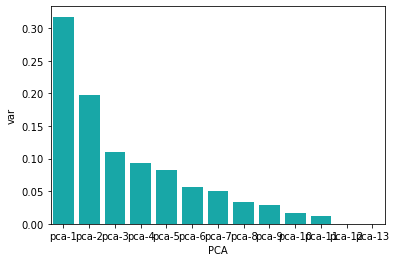

In [94]:
import seaborn as sns
dfexp = pd.DataFrame({'var':pca.explained_variance_ratio_,'PCA':['pca-1','pca-2','pca-3','pca-4','pca-5','pca-6','pca-7','pca-8','pca-9','pca-10','pca-11','pca-12','pca-13']})
sns.barplot(x='PCA',y='var',data=dfexp,color="c");

In [95]:
minmax = MinMaxScaler()
X_min = minmax.fit_transform(X)

In [96]:
X_scale = pd.DataFrame(X_min,columns=X.columns)

In [97]:
X_scale.describe()

Total_Stellar_Mass  Bulge_Stellar_Mass  Cold_Gas_Mass  Hot_Gas_Mass  \
count        5.582544e+06        5.582544e+06   5.582544e+06  5.582544e+06   
mean         4.545589e-02        2.657494e-02   7.350083e-03  1.696277e-03   
std          3.383083e-02        2.878295e-02   1.077140e-02  6.747661e-03   
min          0.000000e+00        0.000000e+00   0.000000e+00  0.000000e+00   
25%          2.264762e-02        9.825275e-03   7.909023e-04  1.281914e-04   
50%          3.964207e-02        1.861835e-02   3.260780e-03  3.694045e-04   
75%          6.096668e-02        3.287596e-02   9.641970e-03  1.138810e-03   
max          1.000000e+00        1.000000e+00   1.000000e+00  1.000000e+00   

       Ejected_Gas_Mass  Intracluster_Stars_Mass  Disk_Scale_Radius  \
count      5.582544e+06             5.582544e+06       5.582544e+06   
mean       2.657314e-03             9.714412e-04       2.361529e-02   
std        9.415666e-03             5.216439e-03       2.661788e-02   
min        0.000000e+00             0.000000e+00       0.000000e+00   
25%        0.000000e+00             0.000000e+00       8.832760e-03   
50%        0.000000e+00             8.095738e-05       1.545332e-02   
75%        2.948426e-04             4.512785e-04       2.847989e-02   
max        1.000000e+00             1.000000e+00       1.000000e+00   

       Total_Star_Formation_Rate  Hot_Gas_Cooling_Rate  AGN_Heating_Rate  \
count               5.582544e+06          5.582544e+06      5.582544e+06   
mean                7.278238e-03          3.720702e-01      3.709462e-01   
std                 1.636769e-02          4.420655e-01      4.408303e-01   
min                 0.000000e+00          0.000000e+00      0.000000e+00   
25%                 0.000000e+00          0.000000e+00      0.000000e+00   
50%                 0.000000e+00          0.000000e+00      0.000000e+00   
75%                 2.938735e-03          8.846485e-01      8.893776e-01   
max                 1.000000e+00          1.000000e+00      1.000000e+00   

       Quasar_BH_Accretion_Mass  Supernova_Cold_Gas_Outflow_Rate  \
count              5.582544e+06                     5.582544e+06   
mean               2.044031e-04                     7.265680e-03   
std                3.148964e-03                     1.635945e-02   
min                0.000000e+00                     0.000000e+00   
25%                0.000000e+00                     0.000000e+00   
50%                0.000000e+00                     0.000000e+00   
75%                0.000000e+00                     2.857436e-03   
max                1.000000e+00                     1.000000e+00   

       Mean_Age_of_Stars  
count       5.582544e+06  
mean        6.691483e-01  
std         1.561189e-01  
min         0.000000e+00  
25%         5.350980e-01  
50%         6.779391e-01  
75%         8.022126e-01  
max         1.000000e+00

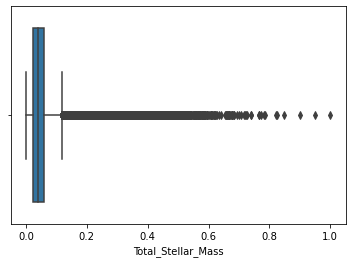

In [98]:
ax = sns.boxplot(x=X_scale['Total_Stellar_Mass'])

In [99]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=6)
#PrincipalComponents = pca.fit_transform(X_scale)
#PrincipalDf = pd.DataFrame(data=PrincipalComponents,columns=['pc-1: total_stellar_mass','pc-2: bulge_stellar_mass','pc-3: cold_gas_mass','pc-4: hot_gas_mass','pc-5: ejected_gas_mass','pc-6: total_star_formation_rate'])
#PrincipalDf.head(5)

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
PrincipalComponents = pca.fit_transform(X_scale)
PrincipalDf = pd.DataFrame(data=PrincipalComponents,columns=X_scale.columns).add_prefix('PCA_')
PrincipalDf.head(5)

PCA_Total_Stellar_Mass  PCA_Bulge_Stellar_Mass  PCA_Cold_Gas_Mass  \
0               -0.545940               -0.137857          -0.042251   
1               -0.556105               -0.220052          -0.029292   
2               -0.519707                0.079333           0.008768   
3                0.629700               -0.173185          -0.013374   
4               -0.502690                0.220607           0.050826   

   PCA_Hot_Gas_Mass  PCA_Ejected_Gas_Mass  PCA_Intracluster_Stars_Mass  \
0         -0.015791              0.011897                     0.008380   
1         -0.001790              0.016163                     0.009255   
2          0.008950              0.012973                    -0.017207   
3         -0.009453             -0.005981                    -0.008452   
4         -0.030716             -0.015400                    -0.007404   

   PCA_Disk_Scale_Radius  PCA_Total_Star_Formation_Rate  \
0              -0.000807                       0.001085   
1               0.000295                       0.002239   
2               0.003079                      -0.000801   
3              -0.000825                      -0.002792   
4              -0.000043                      -0.002605   

   PCA_Hot_Gas_Cooling_Rate  PCA_AGN_Heating_Rate  \
0                  0.001117              0.001448   
1                  0.001439              0.001095   
2                  0.001333              0.008242   
3                 -0.000166              0.001967   
4                 -0.002690             -0.003441   

   PCA_Quasar_BH_Accretion_Mass  PCA_Supernova_Cold_Gas_Outflow_Rate  \
0                      0.000104                             0.000404   
1                     -0.000218                             0.000429   
2                      0.000476                             0.001202   
3                      0.000720                             0.000221   
4                     -0.000233                             0.000099   

   PCA_Mean_Age_of_Stars  
0          -1.974268e-06  
1          -4.348571e-06  
2          -3.256726e-07  
3           1.114125e-05  
4          -4.003526e-06

In [101]:
finalDf = pd.concat([PrincipalDf,dataframe[['Black_Hole_Mass']]],axis=1)
finalDf.head()

PCA_Total_Stellar_Mass  PCA_Bulge_Stellar_Mass  PCA_Cold_Gas_Mass  \
0               -0.545940               -0.137857          -0.042251   
1               -0.556105               -0.220052          -0.029292   
2               -0.519707                0.079333           0.008768   
3                0.629700               -0.173185          -0.013374   
4               -0.502690                0.220607           0.050826   

   PCA_Hot_Gas_Mass  PCA_Ejected_Gas_Mass  PCA_Intracluster_Stars_Mass  \
0         -0.015791              0.011897                     0.008380   
1         -0.001790              0.016163                     0.009255   
2          0.008950              0.012973                    -0.017207   
3         -0.009453             -0.005981                    -0.008452   
4         -0.030716             -0.015400                    -0.007404   

   PCA_Disk_Scale_Radius  PCA_Total_Star_Formation_Rate  \
0              -0.000807                       0.001085   
1               0.000295                       0.002239   
2               0.003079                      -0.000801   
3              -0.000825                      -0.002792   
4              -0.000043                      -0.002605   

   PCA_Hot_Gas_Cooling_Rate  PCA_AGN_Heating_Rate  \
0                  0.001117              0.001448   
1                  0.001439              0.001095   
2                  0.001333              0.008242   
3                 -0.000166              0.001967   
4                 -0.002690             -0.003441   

   PCA_Quasar_BH_Accretion_Mass  PCA_Supernova_Cold_Gas_Outflow_Rate  \
0                      0.000104                             0.000404   
1                     -0.000218                             0.000429   
2                      0.000476                             0.001202   
3                      0.000720                             0.000221   
4                     -0.000233                             0.000099   

   PCA_Mean_Age_of_Stars  Black_Hole_Mass  
0          -1.974268e-06         0.001336  
1          -4.348571e-06         0.001186  
2          -3.256726e-07         0.002302  
3           1.114125e-05         0.002598  
4          -4.003526e-06         0.008644

In [102]:
pca.explained_variance_ratio_

array([9.46598548e-01, 4.57295204e-02, 3.92352459e-03, 1.45409100e-03,
       1.09972672e-03, 4.99604641e-04, 2.92471685e-04, 1.59535466e-04,
       1.14947095e-04, 9.01432230e-05, 1.95672053e-05, 1.81010702e-05,
       2.18810663e-07])

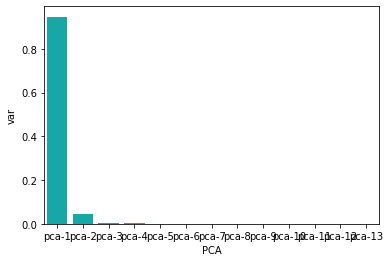

In [103]:
import seaborn as sns
dfexp = pd.DataFrame({'var':pca.explained_variance_ratio_,'PCA':['pca-1','pca-2','pca-3','pca-4','pca-5','pca-6','pca-7','pca-8','pca-9','pca-10','pca-11','pca-12','pca-13']})
sns.barplot(x='PCA',y='var',data=dfexp,color="c");

In [104]:
rb = RobustScaler()
X_rb = rb.fit_transform(X)

In [105]:
X_scale = pd.DataFrame(X_rb,columns=X.columns)

In [106]:
X_scale.describe()

Total_Stellar_Mass  Bulge_Stellar_Mass  Cold_Gas_Mass  Hot_Gas_Mass  \
count        5.582544e+06        5.582544e+06   5.582544e+06  5.582544e+06   
mean         1.517216e-01        3.451778e-01   4.620124e-01  1.312931e+00   
std          8.828721e-01        1.248681e+00   1.216961e+00  6.676764e+00   
min         -1.034526e+00       -8.077137e-01  -3.684053e-01 -3.655232e-01   
25%         -4.434985e-01       -3.814671e-01  -2.790486e-01 -2.386787e-01   
50%          0.000000e+00       -5.413917e-17   0.000000e+00  0.000000e+00   
75%          5.565015e-01        6.185329e-01   7.209514e-01  7.613213e-01   
max          2.506215e+01        4.257495e+01   1.126123e+02  9.891276e+02   

       Ejected_Gas_Mass  Intracluster_Stars_Mass  Disk_Scale_Radius  \
count      5.582544e+06             5.582544e+06       5.582544e+06   
mean       9.012653e+00             1.973247e+00       4.154276e-01   
std        3.193456e+01             1.155925e+01       1.354798e+00   
min        0.000000e+00            -1.793956e-01      -7.865436e-01   
25%        0.000000e+00            -1.793956e-01      -3.369736e-01   
50%        0.000000e+00             1.535448e-17       0.000000e+00   
75%        1.000000e+00             8.206044e-01       6.630264e-01   
max        3.391641e+03             2.215747e+03       5.011147e+01   

       Total_Star_Formation_Rate  Hot_Gas_Cooling_Rate  AGN_Heating_Rate  \
count               5.582544e+06          5.582544e+06      5.582544e+06   
mean                2.476657e+00          4.205854e-01      4.170852e-01   
std                 5.569640e+00          4.997076e-01      4.956616e-01   
min                 0.000000e+00          0.000000e+00      0.000000e+00   
25%                 0.000000e+00          0.000000e+00      0.000000e+00   
50%                 0.000000e+00          0.000000e+00      0.000000e+00   
75%                 1.000000e+00          1.000000e+00      1.000000e+00   
max                 3.402825e+02          1.130392e+00      1.124382e+00   

       Quasar_BH_Accretion_Mass  Supernova_Cold_Gas_Outflow_Rate  \
count              5.582544e+06                     5.582544e+06   
mean               3.551770e-05                     2.542727e+00   
std                5.471734e-04                     5.725220e+00   
min                0.000000e+00                     0.000000e+00   
25%                0.000000e+00                     0.000000e+00   
50%                0.000000e+00                     0.000000e+00   
75%                0.000000e+00                     1.000000e+00   
max                1.737630e-01                     3.499640e+02   

       Mean_Age_of_Stars  
count       5.582544e+06  
mean       -3.291025e-02  
std         5.844639e-01  
min        -2.538008e+00  
25%        -5.347559e-01  
50%        -2.001793e-16  
75%         4.652441e-01  
max         1.205703e+00

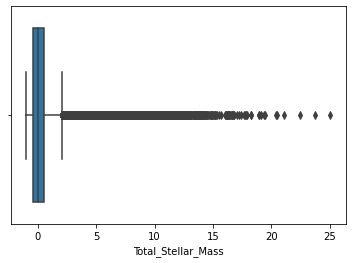

In [107]:
ax = sns.boxplot(x=X_scale['Total_Stellar_Mass'])

In [108]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=6)
#PrincipalComponents = pca.fit_transform(X_scale)
#PrincipalDf = pd.DataFrame(data=PrincipalComponents,columns=['pc-1: total_stellar_mass','pc-2: bulge_stellar_mass','pc-3: cold_gas_mass','pc-4: hot_gas_mass','pc-5: ejected_gas_mass','pc-6: total_star_formation_rate'])
#PrincipalDf.head(5)

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
PrincipalComponents = pca.fit_transform(X_scale)
PrincipalDf = pd.DataFrame(data=PrincipalComponents,columns=X_scale.columns).add_prefix('PCA_')
PrincipalDf.head(5)

PCA_Total_Stellar_Mass  PCA_Bulge_Stellar_Mass  PCA_Cold_Gas_Mass  \
0               -9.096206               -2.669114          -3.435861   
1               -8.948007                2.035165          -3.252168   
2               -9.156956                1.753254          -2.759729   
3               -9.103884               -1.734792          -3.261477   
4               -9.107752               -1.512341          -3.278287   

   PCA_Hot_Gas_Mass  PCA_Ejected_Gas_Mass  PCA_Intracluster_Stars_Mass  \
0          0.545439              1.564582                     0.184351   
1          0.020430              1.129605                     0.781036   
2          1.613816             -0.648884                     0.904031   
3          0.312855              0.778980                    -0.045586   
4          0.374485             -1.252817                    -2.434611   

   PCA_Disk_Scale_Radius  PCA_Total_Star_Formation_Rate  \
0              -0.368565                       0.543850   
1              -0.566352                       0.519641   
2               1.615560                       0.476349   
3               0.294624                      -0.783588   
4               0.370013                       0.359047   

   PCA_Hot_Gas_Cooling_Rate  PCA_AGN_Heating_Rate  \
0                  0.443681             -0.173551   
1                  0.520001             -0.390983   
2                 -0.014766              0.069765   
3                  0.258114             -0.306406   
4                 -0.549442              0.322012   

   PCA_Quasar_BH_Accretion_Mass  PCA_Supernova_Cold_Gas_Outflow_Rate  \
0                     -0.000472                            -0.000017   
1                     -0.004107                             0.000328   
2                      0.002062                             0.000123   
3                      0.009607                            -0.000264   
4                     -0.004053                             0.000473   

   PCA_Mean_Age_of_Stars  
0               0.000010  
1              -0.000038  
2               0.000040  
3               0.000096  
4              -0.000048

In [110]:
finalDf = pd.concat([PrincipalDf,dataframe[['Black_Hole_Mass']]],axis=1)
finalDf.head()

PCA_Total_Stellar_Mass  PCA_Bulge_Stellar_Mass  PCA_Cold_Gas_Mass  \
0               -9.096206               -2.669114          -3.435861   
1               -8.948007                2.035165          -3.252168   
2               -9.156956                1.753254          -2.759729   
3               -9.103884               -1.734792          -3.261477   
4               -9.107752               -1.512341          -3.278287   

   PCA_Hot_Gas_Mass  PCA_Ejected_Gas_Mass  PCA_Intracluster_Stars_Mass  \
0          0.545439              1.564582                     0.184351   
1          0.020430              1.129605                     0.781036   
2          1.613816             -0.648884                     0.904031   
3          0.312855              0.778980                    -0.045586   
4          0.374485             -1.252817                    -2.434611   

   PCA_Disk_Scale_Radius  PCA_Total_Star_Formation_Rate  \
0              -0.368565                       0.543850   
1              -0.566352                       0.519641   
2               1.615560                       0.476349   
3               0.294624                      -0.783588   
4               0.370013                       0.359047   

   PCA_Hot_Gas_Cooling_Rate  PCA_AGN_Heating_Rate  \
0                  0.443681             -0.173551   
1                  0.520001             -0.390983   
2                 -0.014766              0.069765   
3                  0.258114             -0.306406   
4                 -0.549442              0.322012   

   PCA_Quasar_BH_Accretion_Mass  PCA_Supernova_Cold_Gas_Outflow_Rate  \
0                     -0.000472                            -0.000017   
1                     -0.004107                             0.000328   
2                      0.002062                             0.000123   
3                      0.009607                            -0.000264   
4                     -0.004053                             0.000473   

   PCA_Mean_Age_of_Stars  Black_Hole_Mass  
0               0.000010         0.001336  
1              -0.000038         0.001186  
2               0.000040         0.002302  
3               0.000096         0.002598  
4              -0.000048         0.008644

In [111]:
pca.explained_variance_ratio_

array([8.05414679e-01, 1.29260168e-01, 4.98711772e-02, 1.15779601e-02,
       1.42621156e-03, 1.27759316e-03, 6.28141720e-04, 2.65416327e-04,
       1.44158537e-04, 1.25239617e-04, 9.14403336e-06, 1.10479254e-07,
       1.85606647e-10])

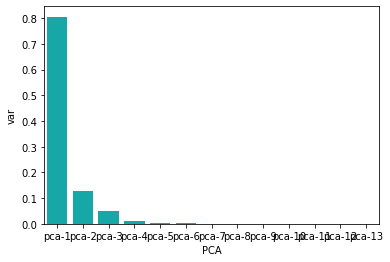

In [112]:
import seaborn as sns
dfexp = pd.DataFrame({'var':pca.explained_variance_ratio_,'PCA':['pca-1','pca-2','pca-3','pca-4','pca-5','pca-6','pca-7','pca-8','pca-9','pca-10','pca-11','pca-12','pca-13']})
sns.barplot(x='PCA',y='var',data=dfexp,color="c");

<AxesSubplot:xlabel='Black_Hole_Mass', ylabel='Density'>

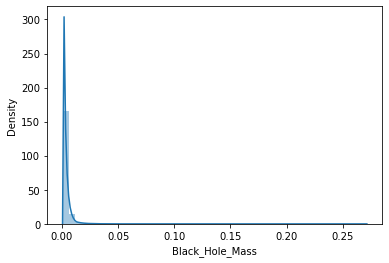

In [113]:
sns.distplot(dataframe.Black_Hole_Mass)

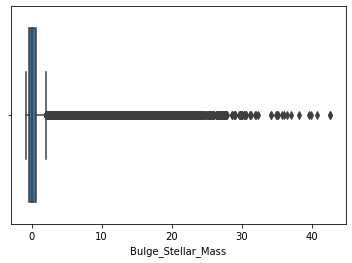

In [114]:
ax = sns.boxplot(x=X_scale['Bulge_Stellar_Mass'])

In [115]:
from sklearn.preprocessing import QuantileTransformer

In [116]:
qn = QuantileTransformer()
X_qn = qn.fit_transform(X)

In [119]:
X_scale = pd.DataFrame(X_qn,columns=X.columns)

In [120]:
X_scale.describe()

Total_Stellar_Mass  Bulge_Stellar_Mass  Cold_Gas_Mass  Hot_Gas_Mass  \
count        5.582544e+06        5.582544e+06   5.582544e+06  5.582544e+06   
mean         4.983013e-01        4.999360e-01   4.981545e-01  4.986624e-01   
std          2.883813e-01        2.882298e-01   2.941222e-01  2.925432e-01   
min          0.000000e+00        0.000000e+00   0.000000e+00  0.000000e+00   
25%          2.481354e-01        2.510408e-01   2.507427e-01  2.513902e-01   
50%          4.968927e-01        4.991236e-01   5.036980e-01  5.012238e-01   
75%          7.483956e-01        7.496344e-01   7.515195e-01  7.508279e-01   
max          1.000000e+00        1.000000e+00   1.000000e+00  1.000000e+00   

       Ejected_Gas_Mass  Intracluster_Stars_Mass  Disk_Scale_Radius  \
count      5.582544e+06             5.582544e+06       5.582544e+06   
mean       2.644058e-01             4.494631e-01       4.997115e-01   
std        3.949991e-01             3.478631e-01       2.887378e-01   
min        0.000000e+00             0.000000e+00       0.000000e+00   
25%        0.000000e+00             0.000000e+00       2.499483e-01   
50%        0.000000e+00             5.007050e-01       4.981137e-01   
75%        7.518695e-01             7.516381e-01       7.504735e-01   
max        1.000000e+00             1.000000e+00       1.000000e+00   

       Total_Star_Formation_Rate  Hot_Gas_Cooling_Rate  AGN_Heating_Rate  \
count               5.582544e+06          5.582544e+06      5.582544e+06   
mean                2.853522e-01          3.289214e-01      3.291996e-01   
std                 3.975768e-01          3.979689e-01      3.984992e-01   
min                 0.000000e+00          0.000000e+00      0.000000e+00   
25%                 0.000000e+00          0.000000e+00      0.000000e+00   
50%                 0.000000e+00          0.000000e+00      0.000000e+00   
75%                 7.504094e-01          7.497817e-01      7.509120e-01   
max                 1.000000e+00          1.000000e+00      1.000000e+00   

       Quasar_BH_Accretion_Mass  Supernova_Cold_Gas_Outflow_Rate  \
count              5.582544e+06                     5.582544e+06   
mean               4.570509e-02                     2.836034e-01   
std                2.062801e-01                     3.971835e-01   
min                0.000000e+00                     0.000000e+00   
25%                0.000000e+00                     0.000000e+00   
50%                0.000000e+00                     0.000000e+00   
75%                0.000000e+00                     7.488704e-01   
max                1.000000e+00                     1.000000e+00   

       Mean_Age_of_Stars  
count       5.582544e+06  
mean        4.990947e-01  
std         2.898892e-01  
min         0.000000e+00  
25%         2.468913e-01  
50%         4.974341e-01  
75%         7.516819e-01  
max         1.000000e+00

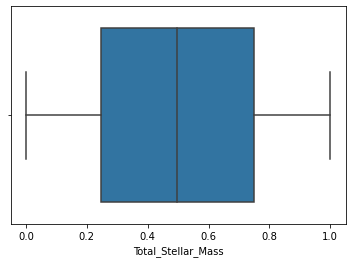

In [132]:
ax = sns.boxplot(x=X_scale['Total_Stellar_Mass'])

In [124]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
PrincipalComponents = pca.fit_transform(X_scale)
PrincipalDf = pd.DataFrame(data=PrincipalComponents,columns=X_scale.columns).add_prefix('PCA_')
PrincipalDf.head(5)

PCA_Total_Stellar_Mass  PCA_Bulge_Stellar_Mass  PCA_Cold_Gas_Mass  \
0               -0.753512               -0.712165          -0.432710   
1               -0.657810                0.454851          -0.556832   
2                0.273549                0.462329           0.549213   
3               -0.165348                0.361428          -0.336811   
4               -0.561497                0.126354           0.512247   

   PCA_Hot_Gas_Mass  PCA_Ejected_Gas_Mass  PCA_Intracluster_Stars_Mass  \
0         -0.257482             -0.070313                     0.123970   
1         -0.162405              0.686630                     0.155402   
2         -0.190505              0.815134                     0.093429   
3         -0.081735             -0.443209                     0.058254   
4          0.585469             -0.164519                     0.218601   

   PCA_Disk_Scale_Radius  PCA_Total_Star_Formation_Rate  \
0              -0.021281                      -0.237536   
1              -0.021128                      -0.249865   
2              -0.068915                      -0.185177   
3              -0.139660                      -0.064525   
4              -0.328466                       0.128314   

   PCA_Hot_Gas_Cooling_Rate  PCA_AGN_Heating_Rate  \
0                  0.175464             -0.012860   
1                  0.027346              0.017336   
2                 -0.039800             -0.013132   
3                  0.131052              0.120602   
4                 -0.011725             -0.248218   

   PCA_Quasar_BH_Accretion_Mass  PCA_Supernova_Cold_Gas_Outflow_Rate  \
0                      0.038529                             0.003450   
1                      0.061148                            -0.003348   
2                      0.085761                            -0.003700   
3                     -0.145120                             0.005304   
4                      0.012028                            -0.001807   

   PCA_Mean_Age_of_Stars  
0               0.000470  
1              -0.002840  
2              -0.006081  
3               0.004712  
4              -0.001745

In [125]:
finalDf = pd.concat([PrincipalDf,dataframe[['Black_Hole_Mass']]],axis=1)
finalDf.head()

PCA_Total_Stellar_Mass  PCA_Bulge_Stellar_Mass  PCA_Cold_Gas_Mass  \
0               -0.753512               -0.712165          -0.432710   
1               -0.657810                0.454851          -0.556832   
2                0.273549                0.462329           0.549213   
3               -0.165348                0.361428          -0.336811   
4               -0.561497                0.126354           0.512247   

   PCA_Hot_Gas_Mass  PCA_Ejected_Gas_Mass  PCA_Intracluster_Stars_Mass  \
0         -0.257482             -0.070313                     0.123970   
1         -0.162405              0.686630                     0.155402   
2         -0.190505              0.815134                     0.093429   
3         -0.081735             -0.443209                     0.058254   
4          0.585469             -0.164519                     0.218601   

   PCA_Disk_Scale_Radius  PCA_Total_Star_Formation_Rate  \
0              -0.021281                      -0.237536   
1              -0.021128                      -0.249865   
2              -0.068915                      -0.185177   
3              -0.139660                      -0.064525   
4              -0.328466                       0.128314   

   PCA_Hot_Gas_Cooling_Rate  PCA_AGN_Heating_Rate  \
0                  0.175464             -0.012860   
1                  0.027346              0.017336   
2                 -0.039800             -0.013132   
3                  0.131052              0.120602   
4                 -0.011725             -0.248218   

   PCA_Quasar_BH_Accretion_Mass  PCA_Supernova_Cold_Gas_Outflow_Rate  \
0                      0.038529                             0.003450   
1                      0.061148                            -0.003348   
2                      0.085761                            -0.003700   
3                     -0.145120                             0.005304   
4                      0.012028                            -0.001807   

   PCA_Mean_Age_of_Stars  Black_Hole_Mass  
0               0.000470         0.001336  
1              -0.002840         0.001186  
2              -0.006081         0.002302  
3               0.004712         0.002598  
4              -0.001745         0.008644

In [126]:
pca.explained_variance_ratio_

array([4.50096757e-01, 1.58393034e-01, 1.03051629e-01, 8.58263400e-02,
       7.18736111e-02, 3.64567146e-02, 2.83969374e-02, 2.33912467e-02,
       1.98042909e-02, 1.23654810e-02, 9.77157556e-03, 4.02498512e-04,
       1.69884716e-04])

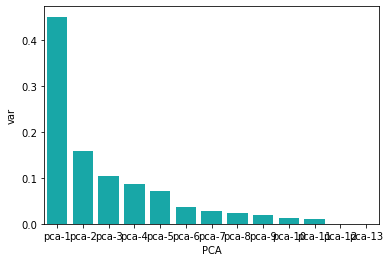

In [127]:
import seaborn as sns
dfexp = pd.DataFrame({'var':pca.explained_variance_ratio_,'PCA':['pca-1','pca-2','pca-3','pca-4','pca-5','pca-6','pca-7','pca-8','pca-9','pca-10','pca-11','pca-12','pca-13']})
sns.barplot(x='PCA',y='var',data=dfexp,color="c");

<AxesSubplot:xlabel='Total_Stellar_Mass', ylabel='Density'>

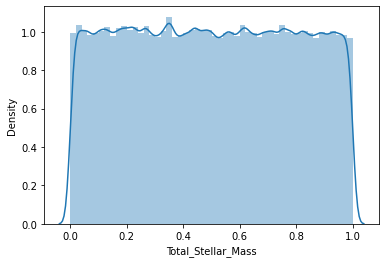

In [130]:
sns.distplot(X_scale['Total_Stellar_Mass'])